# ISyE 6644 – Summer 2021
# Project 1: *Pandemic Flu Spread* (Q4)
## Team BMK: Kevin Cooper, Brent Radcliffe, Matteo Zullo

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from google.colab import files


def initialize_kids():
    """ The function initializes the classroom with kid_0 as infected."""
    kids = ['kid_0'] + ['kid_' + str(i) for i in range(1, 21)]  # kid tag
    sick = [1] + [0 for i in range(1, 21)]  # infected yes/no
    counter = [1] + [0 for i in range(1, 21)]  # lenght of infection
    return {'kids': kids, 'sick': sick, 'counter': counter}  # output dictionary


def count_infected(probs: list):
    """ The function returns the number of infected kids"""
    return sum(probs)


def update_kids(kids: dict, n_infected: int):
    """ The function updates the health status of kids."""

    # Begin of day: Update status of healthy kids.
    for i in range(21):  # loop through kids

      # update sick kids
      if kids['counter'][i] > 0:
        kids['counter'][i] += 1

      # update healthy kids
      if kids['counter'][i] == 0:
        count = 0
        while count < n_infected:  # n independent Bern(0.02)
          p = random.random()  # generate random Unif(0,1)
          if (p <= 0.02): # probability of infection
            kids['sick'][i] = 1  # update status to sick
            kids['counter'][i] += 1  # add 1 to counter
          count += 1

    # End of day: Update status of recovered kids.
    for i in range(21):
      if kids['counter'][i] >= 4:
        kids['sick'][i] = 0
    return kids


def simulate_day1(no_runs = 10000):
  """ The function simulates day-1 spread."""
  output = []
  run = 0

  while run < no_runs:
    # initialize classroom
    kids_0 = initialize_kids()
    n_0 = count_infected(kids_0['sick'])
    # day 1
    kids_1 = update_kids(kids_0, n_0)
    no_1 = count_infected(kids_1['sick'])
    output.append(no_1)
    run += 1
  return output


def simulate_day2(no_runs = 10000):
  """ The function simulates day-2 spread."""
  output = []
  run = 0

  while run < no_runs:
    # initialize classroom
    kids_0 = initialize_kids()
    n_0 = count_infected(kids_0['sick'])
    # day 1
    kids_1 = update_kids(kids_0, n_0)
    no_1 = count_infected(kids_1['sick'])
    # day 2
    kids_2 = update_kids(kids_1, no_1)
    no_2 = count_infected(kids_2['sick'])
    output.append(no_2)
    run += 1
  return output


def simulate_epidemic(no_runs = 10000):
  """ The function simulates an epidemic."""

  length = []
  days = defaultdict(list)
  run = 0

  while run < no_runs:
  
    # initialize classroom
    kids__ = initialize_kids()
    no__ = count_infected(kids__['sick'])
    no_day = 0
    # stop epidemic when everyone's healthy again
    while no__ > 0:
      kids__ = update_kids(kids__, no__)
      no__ = count_infected(kids__['sick'])
      no_day += 1  # add to counter
      days[str(no_day)].append(no__)

    # save output
    length.append(no_day)
    run += 1
  
  # fill in 0s for missing days (epidemic ends at different times but arrays must have equal length!)
  for day, values in days.items():
    days[day] = values + [0 for i in range(no_runs - len(values))]

  return length, days


def expected_value(cases: list):
  return sum([cases.count(x_i)/len(cases)*x_i for x_i in set(cases)])


def plot_cases(cases: list, xlab :str, file_name: str):
  """ The function returns the pdf of number of cases."""
  plt.hist(cases, density=True, bins = list(set(cases)))
  plt.ylabel('Frequency')
  plt.xlabel(xlab)
  plt.savefig(file_name)
  files.download(file_name)
  return plt.show()

## Part a.

The empirical distribution of infected kids at day 1 (averaged over 10,000 simulation runs) is plotted below. The functional form for the empirical PDF $X= f(x)$ can be obtained by calculating the probability of each outcome. 

This would be a categorical variable or generalized Bernoulli, in which the outcome $x=0$ has probability $0$ and outcomes $[1,\cdots,x_i,\cdots,21]$ have probability $p_i$. Please note that the cap is set at 21 because that is the maximum number of infected students in the (almost impossible) case in which patient 0 succeeded in infecting all the other kids by day 1.

$\begin{equation}
    X=
    \begin{cases}
      0, & \text{if}\ x=0 \\
      p_1, & \text{if}\ x=1 \\
      \cdots, & \cdots \\
      p_i, & \text{if}\ x=x_i \\
      \cdots, & \cdots \\
      p_{21}, & x=21 \\
      0, & otherwise \\
    \end{cases}
  \end{equation}
$

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

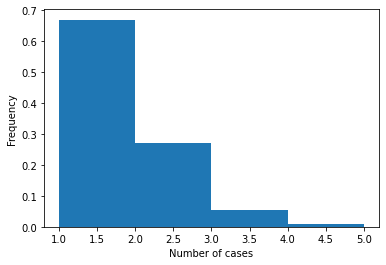



Here's the event set with associated probabilities:
p = 0, if x = 0
p = 1, if x = 0.6697
p = 2, if x = 0.2695
p = 3, if x = 0.053
p = 4, if x = 0.0074
p = 5, if x = 0.0004
p = 0, otherwise


In [ ]:
day_1 = simulate_day1()  # day 1 simulation
plot_cases(day_1, "Number of cases", "day_1_hist.png")  # plot PDF

print("\n")
print("Here's the event set with associated probabilities:")
print("p = 0, if x = 0")
for x_i in set(day_1):
  p_i = day_1.count(x_i)/len(day_1)
  print("p = {}, if x = {}".format(x_i, p_i))
print("p = 0, otherwise")

## Part b.
The expected value of the number of kids that Tommy infects on Day 1 is given by the weighted occurrence of each outcome in the event set with weights for the probability of the outcome happening. More formally:

$$E[X] = \sum_i x_ip_i$$


In [ ]:
E_X = expected_value(day_1)
print("The expected value is {}.".format(E_X))

The expected value is 1.4105999999999999.


## Part c.

The expected number of kids infected by day 2 equals the expected number of sick kids at the end of day 2. Please note that we do not have to cumulate here because kids are sick for three days starting from the day following the infection. Therefore, there would be no kid who has fully recovered from the infection by the end of day 2. Again, we simulate the 2-day viral spread over 1,000 runs.

In [ ]:
day_2 = simulate_day2()  # day 1 simulation
E_X = expected_value(day_2)
print("The expected value is {}.".format(E_X))

The expected value is 1.9362000000000001.


## Part d.
The expected number of days that the pandemic slast is the number of days until there are no sick kids. We wrote a function with said stop criterion, and executed it 10,000 times. Below, we show a histogram of the timespan distribution and the expected number of cases by the day. The pandemic is very likely (>30%) to last 3 days because the patient-0 probability of infecting other kids is very low. Another peak is seen at 6 days, which happens when only one kid gets infected. However, outcomes between 7-13 days are all similarly likely with a probability of about 5%. Longer epidemics are far less likely, and the histogram quickly tapers off.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

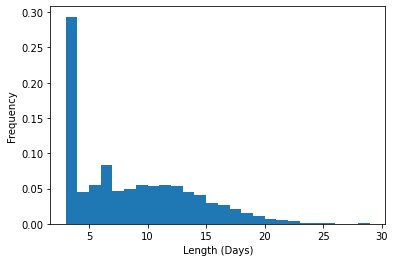

Expected values for each day:
E[x=1] = 1.4021000000000001
E[x=2] = 1.9325
E[x=3] = 1.6412999999999998
E[x=4] = 1.7783
E[x=5] = 1.7798999999999994
E[x=6] = 1.5695000000000001
E[x=7] = 1.4196
E[x=8] = 1.2131
E[x=9] = 0.9863999999999999
E[x=10] = 0.793
E[x=11] = 0.6072000000000001
E[x=12] = 0.45099999999999996
E[x=13] = 0.33469999999999994
E[x=14] = 0.2463
E[x=15] = 0.17420000000000002
E[x=16] = 0.12
E[x=17] = 0.0772
E[x=18] = 0.0493
E[x=19] = 0.0314
E[x=20] = 0.0203
E[x=21] = 0.013300000000000001
E[x=22] = 0.008199999999999999
E[x=23] = 0.004999999999999999
E[x=24] = 0.0036
E[x=25] = 0.0016
E[x=26] = 0.0010999999999999998
E[x=27] = 0.0005
E[x=28] = 0.0002
E[x=29] = 0.0


In [ ]:
length, days = simulate_epidemic()
plot_cases(length, "Length (Days)", "pandemic_len.png")  # plot PDF

print("Expected values for each day:")
for day, values in days.items():
  E_X = expected_value(values)
  print("E[x={}] = {}".format(day, E_X))